# The effect of the Russian-Ukrainian conflict from the perspective of Internet eXchanges

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import OrderedDict
from pandas.errors import EmptyDataError

In [ ]:
'''Make the Database for mapping an ASN to a Country
    Requires the RIR Statistics files to run
'''
def makeASNDB():
    path = os.getcwd() + "\\ASN DB\\"
    headers = [
            "Registry",
            "Country Code",
            "Type",
            "Start",
            "Value",
            "Date",
            "Status",
            "Extensions",
        ]
    ASNDB = []
    for f in os.listdir(path):
        ASNDB.append(pd.read_csv(
                    path + f,
                    delimiter="|",
                    comment="#",
                    names=headers,
                    dtype=str,
                    keep_default_na=False,
                    na_values=[""],
                    encoding="utf-8",
                )[4:])
    ASNDB = pd.concat(ASNDB)
    ASNDB = ASNDB[ASNDB['Type'] == 'asn']
    ASNDB = ASNDB.drop(columns = ["Registry", "Type", "Value", "Date", "Status", "Extensions"])
    ASNDB.to_csv('ASNDB.csv', index = False) 

def getCC(asn):
    r = DB[DB['Start'] == asn]['Country Code'].to_string(index = False)[1:]
    if len(r) > 2:
        r = None
    return r

In [35]:
'''Make filtered datasets
    Requires the IXP statistics files
    Results in 2 folders RU and UA where Russian and Ukrainian AS Origins are split'''
asndb=pd.read_csv('ASNDB.csv')
asndb=asndb.set_index('asn')
path = os.getcwd() + '/Dataset'
for f in os.listdir(path)[1871:]:
#         if f.startswith(date):
    print('Working on: ', f)
    if '.csv' in f:
        try:
            data = pd.read_csv(path + '\\' + f, usecols = ['NETWORK', 'AS_PATH', 'as_origin', 'as_neigh'])
        except EmptyDataError:
            continue
    else:
        continue
    data['asn'] = data['as_origin']
    data = data.set_index('asn')
    try:
        data = data.join(asndb)
    except ValueError:
        continue
    ruASN = data[data['cc'] =='RU'] # Filter on Russian ASNs
    ruASN.to_csv('./Dataset/RU/' + f, index = False, columns = {'NETWORK', 'AS_PATH', 'as_origin', 'as_neigh'})
    uaASN = data[data['cc'] == 'UA'] # Filter on Ukrainian ASNs
    uaASN.to_csv('./Dataset/UA/' + f , index = False, columns = {'NETWORK', 'AS_PATH', 'as_origin', 'as_neigh'})
    restASN = data[(data['cc'] != 'UA') & (data['cc'] != 'RU')] ## Filter on the rest of ASNs (not Ukrainian or Russian)
    restASN.to_csv('./Dataset/REST/' + f , index = False, columns = {'NETWORK', 'AS_PATH', 'as_origin', 'as_neigh'})

Working on:  2022-02-19_rtable_ALICERS_amsix.csv
Working on:  2022-02-19_rtable_ALICE_linx.csv
Working on:  2022-02-19_rtable_BIRD_poaixbr.csv
Working on:  2022-02-19_rtable_BIRD_spoixbr.csv
Working on:  2022-02-19_rtable_TXT_six.csv
Working on:  2022-02-20_rtable_ALICERS_amsix.csv
Working on:  2022-02-20_rtable_ALICE_decix.csv
Working on:  2022-02-20_rtable_ALICE_linx.csv
Working on:  2022-02-20_rtable_BIRD_poaixbr.csv
Working on:  2022-02-20_rtable_BIRD_spoixbr.csv
Working on:  2022-02-20_rtable_TXT_six.csv
Working on:  2022-02-21_rtable_ALICERS_amsix.csv
Working on:  2022-02-21_rtable_ALICE_auix.csv
Working on:  2022-02-21_rtable_ALICE_decix.csv
Working on:  2022-02-21_rtable_ALICE_linx.csv
Working on:  2022-02-21_rtable_BIRD_poaixbr.csv
Working on:  2022-02-21_rtable_BIRD_spoixbr.csv
Working on:  2022-02-21_rtable_TXT_six.csv
Working on:  2022-02-22_rtable_ALICERS_amsix.csv
Working on:  2022-02-22_rtable_ALICE_auix.csv
Working on:  2022-02-22_rtable_ALICE_linx.csv
Working on:  2022

Working on:  2022-03-18_rtable_TXT_six.csv
Working on:  2022-03-19_rtable_ALICERS_amsix.csv
Working on:  2022-03-19_rtable_ALICE_auix.csv
Working on:  2022-03-19_rtable_ALICE_linx.csv
Working on:  2022-03-19_rtable_BIRD_poaixbr.csv
Working on:  2022-03-19_rtable_BIRD_spoixbr.csv
Working on:  2022-03-19_rtable_TXT_six.csv
Working on:  2022-03-20_rtable_ALICERS_amsix.csv
Working on:  2022-03-20_rtable_ALICE_auix.csv
Working on:  2022-03-20_rtable_ALICE_decix.csv
Working on:  2022-03-20_rtable_ALICE_linx.csv
Working on:  2022-03-20_rtable_BIRD_poaixbr.csv
Working on:  2022-03-20_rtable_BIRD_spoixbr.csv
Working on:  2022-03-20_rtable_TXT_six.csv
Working on:  2022-03-21_rtable_ALICERS_amsix.csv
Working on:  2022-03-21_rtable_ALICE_auix.csv
Working on:  2022-03-21_rtable_ALICE_linx.csv
Working on:  2022-03-21_rtable_BIRD_poaixbr.csv
Working on:  2022-03-21_rtable_BIRD_spoixbr.csv
Working on:  2022-03-21_rtable_TXT_six.csv
Working on:  2022-03-22_rtable_ALICERS_amsix.csv
Working on:  2022-03-

Working on:  2022-04-15_rtable_ALICE_auix.csv
Working on:  2022-04-15_rtable_ALICE_linx.csv
Working on:  2022-04-15_rtable_BIRD_poaixbr.csv
Working on:  2022-04-15_rtable_BIRD_spoixbr.csv
Working on:  2022-04-15_rtable_TXT_six.csv
Working on:  2022-04-16_rtable_ALICERS_amsix.csv
Working on:  2022-04-16_rtable_ALICE_auix.csv
Working on:  2022-04-16_rtable_ALICE_linx.csv
Working on:  2022-04-16_rtable_BIRD_poaixbr.csv
Working on:  2022-04-16_rtable_BIRD_spoixbr.csv
Working on:  2022-04-16_rtable_TXT_six.csv
Working on:  2022-04-17_rtable_ALICERS_amsix.csv
Working on:  2022-04-17_rtable_ALICE_auix.csv
Working on:  2022-04-17_rtable_ALICE_linx.csv
Working on:  2022-04-17_rtable_BIRD_poaixbr.csv
Working on:  2022-04-17_rtable_BIRD_spoixbr.csv
Working on:  2022-04-17_rtable_TXT_six.csv
Working on:  2022-04-18_rtable_ALICERS_amsix.csv
Working on:  2022-04-18_rtable_ALICE_auix.csv
Working on:  2022-04-18_rtable_ALICE_linx.csv
Working on:  2022-04-18_rtable_BIRD_poaixbr.csv
Working on:  2022-04

In [2]:
'''Process data for Russia
    Requires files in the RU folder from the operation above
    '''
path = os.getcwd() + '/Dataset/RU'
ru = {'auix' : OrderedDict(), 'decix' : OrderedDict(), 'linx' : OrderedDict(), 'amsix' : OrderedDict(), 'poaixbr' : OrderedDict(), 'spoixbr' : OrderedDict(), 'six' : OrderedDict()}
rud = {'auix' : OrderedDict(), 'decix' : OrderedDict(), 'linx' : OrderedDict(), 'amsix' : OrderedDict(), 'poaixbr' : OrderedDict(), 'spoixbr' : OrderedDict(), 'six' : OrderedDict()}
run = {'auix' : OrderedDict(), 'decix' : OrderedDict(), 'linx' : OrderedDict(), 'amsix' : OrderedDict(), 'poaixbr' : OrderedDict(), 'spoixbr' : OrderedDict(), 'six' : OrderedDict()}

for f in os.listdir(path)[1871:]: #Indicates which files to process 1871 is 19th of Feb 2022
#     print(f)
#     if '-13' in f and '.csv' in f:
    if '.csv' in f:
        try:
                data = pd.read_csv(path + '/' + f, usecols = ['as_origin', 'NETWORK'])
        except EmptyDataError:
            continue
    else:
        print('PASS')
        continue
    date = f[:10]
#     data = data.drop_duplicates(subset=['as_origin'], keep='first')
    size = data.shape[0]
    sized = data.drop_duplicates(subset=['as_origin'], keep='first').shape[0]
    sizen = data.drop_duplicates(subset=['NETWORK'], keep='first').shape[0]
    if 'auix' in f:
        ru['auix'][date] = size
        rud['auix'][date] = sized
        run['auix'][date] = sizen
    elif 'decix' in f:
        ru['decix'][date] = size
        rud['decix'][date] = sized
        run['decix'][date] = sizen
    elif 'linx' in f:
        ru['linx'][date] = size
        rud['linx'][date] = sized
        run['linx'][date] = sizen
    elif 'amsix' in f:
        ru['amsix'][date] = size
        rud['amsix'][date] = sized
        run['amsix'][date] = sizen
    elif 'poaixbr' in f:
        ru['poaixbr'][date] = size
        rud['poaixbr'][date] = sized
        run['poaixbr'][date] = sizen
    elif 'spoixbr' in f:
        ru['spoixbr'][date] = size
        rud['spoixbr'][date] = sized
        run['spoixbr'][date] = sizen
    elif 'six' in f:
        ru['six'][date] = size
        rud['six'][date] = sized
        run['six'][date] = sizen
# import pickle
# with open('RUCount', 'wb') as handle:
#     pickle.dump(ru, handle)
print("DONE")

DONE


In [6]:
'''Process data for Ukraine
    Requires files in the UA folder from the operation above
    '''
path = os.getcwd() + '/Dataset/UA'
ua = {'auix' : OrderedDict(), 'decix' : OrderedDict(), 'linx' : OrderedDict(), 'amsix' : OrderedDict(), 'poaixbr' : OrderedDict(), 'spoixbr' : OrderedDict(), 'six' : OrderedDict()}
uad = {'auix' : OrderedDict(), 'decix' : OrderedDict(), 'linx' : OrderedDict(), 'amsix' : OrderedDict(), 'poaixbr' : OrderedDict(), 'spoixbr' : OrderedDict(), 'six' : OrderedDict()}

for f in os.listdir(path)[1871:]:
#     print(f)
#     if '-25' in f and '.csv' in f:
    if '.csv' in f:
        try:
                data = pd.read_csv(path + '/' + f, usecols = ['as_origin'])
        except EmptyDataError:
            continue
    else:
        print('PASS')
        continue
    date = f[:10]
    size = data.shape[0]
    data = data.drop_duplicates(subset=['as_origin'], keep='first')
    sized = data.shape[0]
    if 'auix' in f:
        ua['auix'][date] = size
        uad['auix'][date] = sized
    elif 'decix' in f:
        ua['decix'][date] = size
        uad['decix'][date] = sized
    elif 'linx' in f:
        ua['linx'][date] = size
        uad['linx'][date] = sized
    elif 'amsix' in f:
        ua['amsix'][date] = size
        uad['amsix'][date] = sized
    elif 'poaixbr' in f:
        ua['poaixbr'][date] = size
        uad['poaixbr'][date] = sized
    elif 'spoixbr' in f:
        ua['spoixbr'][date] = size
        uad['spoixbr'][date] = sized
    elif 'six' in f:
        ua['six'][date] = size
        uad['six'][date] = sized
# import pickle
# with open('UACount', 'wb') as handle:
#     pickle.dump(ua, handle)
print("DONE")

DONE


In [3]:
'''Process data for the rest
    Requires files in the REST folder from the operation above
    '''
path = os.getcwd() + '/Dataset/REST'
rest = {'auix' : OrderedDict(), 'decix' : OrderedDict(), 'linx' : OrderedDict(), 'amsix' : OrderedDict(), 'poaixbr' : OrderedDict(), 'spoixbr' : OrderedDict(), 'six' : OrderedDict()}

for f in os.listdir(path)[1868:]:
#     print(f)
#     if '-13' in f and '.csv' in f:
    if '.csv' in f:
        try:
                data = pd.read_csv(path + '/' + f, usecols = ['as_origin'])
        except EmptyDataError:
            continue
    else:
        print('PASS')
        continue
    date = f[:10]
#     data = data.drop_duplicates(subset=['as_origin'], keep='first')
    size = data.shape[0]
    if 'auix' in f:
        rest['auix'][date] = size
    elif 'decix' in f:
        rest['decix'][date] = size
    elif 'linx' in f:
        rest['linx'][date] = size
    elif 'amsix' in f:
        rest['amsix'][date] = size
    elif 'poaixbr' in f:
        rest['poaixbr'][date] = size
    elif 'spoixbr' in f:
        rest['spoixbr'][date] = size
    elif 'six' in f:
        rest['six'][date] = size
# import pickle
# with open('RESTCount', 'wb') as handle:
#     pickle.dump(rest, handle)
print("DONE")

DONE


# SIX AUIX SPOIXBR Russian Distinct AS Origins

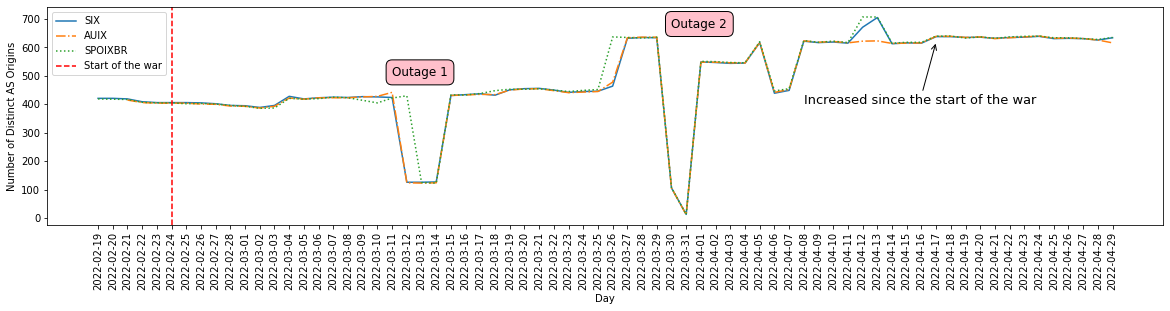

In [38]:
import matplotlib.pyplot as plt
f = plt.figure()
# plt.title('Ukrainian Prefix Annoucements')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of Distinct AS Origins')

plt.plot(list(rud['six'].keys()), list(rud['six'].values()), label = 'SIX')
plt.plot(list(rud['auix'].keys()), list(rud['auix'].values()), label = 'AUIX', linestyle='dashdot')
plt.plot(list(rud['spoixbr'].keys()), list(rud['spoixbr'].values()), label = 'SPOIXBR', linestyle='dotted')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.annotate('Outage 1', xy=('2022-03-11', 500), fontsize=12,
bbox=dict(boxstyle='round', pad=0.5, fc='pink'))
plt.annotate('Outage 2', xy=('2022-03-30', 670), fontsize=12,
bbox=dict(boxstyle='round', pad=0.5, fc='pink'))
plt.annotate('Increased since the start of the war', fontsize=13, xy=('2022-04-17', 620), xytext=('2022-04-08', 400), arrowprops=dict(arrowstyle='->'))
plt.legend(loc='upper left')

# AMSIX RUSSIA

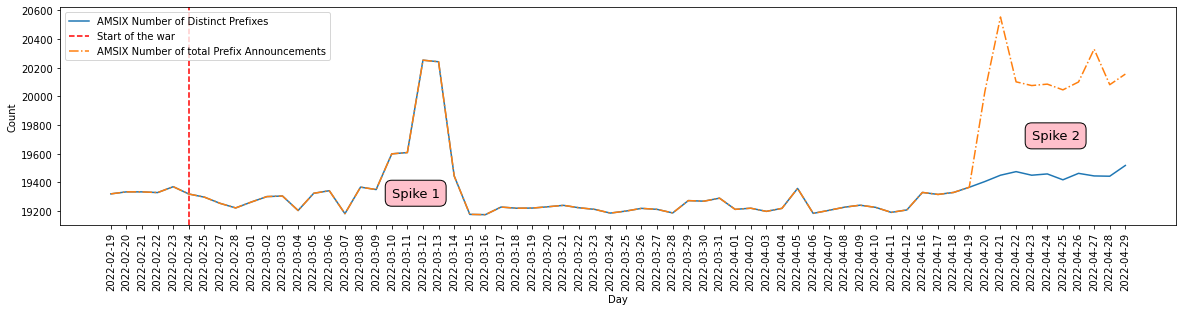

In [35]:
import matplotlib.pyplot as plt
f = plt.figure()
# plt.title('Ukrainian Prefix Annoucements')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Count')
# plt.plot(list(ua['amsix'].keys()), list(ua['amsix'].values()), label = 'AMSIX')
# plt.plot(list(ru['linx'].keys()), list(ru['linx'].values()), label = 'LINX', linestyle = 'dashdot')
plt.plot(list(run['amsix'].keys()), list(run['amsix'].values()), label = 'AMSIX Number of Distinct Prefixes')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.plot(list(ru['amsix'].keys()), list(ru['amsix'].values()), label = 'AMSIX Number of total Prefix Announcements', linestyle = 'dashdot')
plt.annotate('Spike 1', xy=('2022-03-10', 19300), fontsize=13,
bbox=dict(boxstyle='round', pad=0.5, fc='pink'))
plt.annotate('Spike 2', xy=('2022-04-23', 19700), fontsize=13,
bbox=dict(boxstyle='round', pad=0.5, fc='pink'))
# plt.plot(list(ru['linx'].keys()), list(ru['linx'].values()), label = 'LINX Prefix Announcements', linestyle = 'dashdot')
# plt.plot(list(run['linx'].keys()), list(run['linx'].values()), label = 'LINX Distinct Prefixes', linestyle = 'dashdot')

plt.legend(loc='upper left')

# SIX AUIX SPOXIBR Ukraine Prefix Annoucements

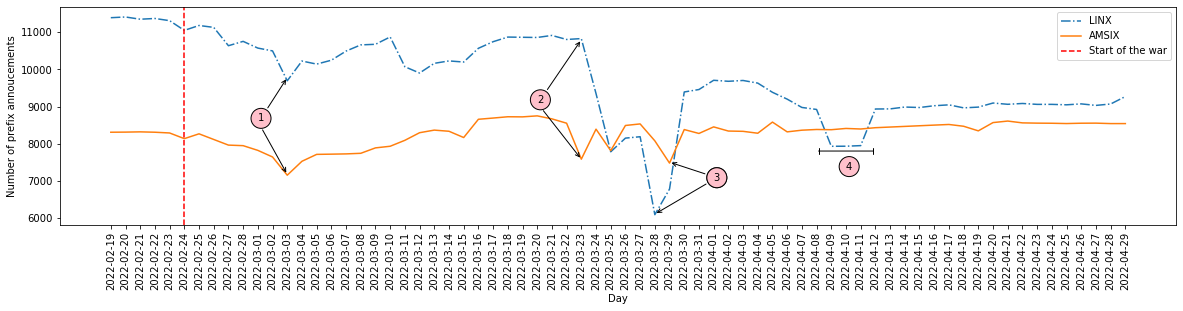

In [25]:
import matplotlib.pyplot as plt
f = plt.figure()
# plt.title('Ukrainian Prefix Annoucements')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of prefix annoucements')
# plt.plot(list(ua['amsix'].keys()), list(ua['amsix'].values()), label = 'AMSIX')
plt.plot(list(ua['linx'].keys()), list(ua['linx'].values()), label = 'LINX', linestyle = 'dashdot')
plt.plot(list(ua['amsix'].keys()), list(ua['amsix'].values()), label = 'AMSIX')
# plt.plot(list(ru['six'].keys()), list(ru['six'].values()), label = 'Russia')
# plt.plot(list(rest['amsix'].keys()), list(rest['amsix'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.annotate('', xy=('2022-03-03', 7170), xytext=('2022-03-01', 8600), arrowprops=dict(arrowstyle='->'), bbox=dict(boxstyle='circle', pad=0.5, fc='pink'))
plt.annotate('1', xy=('2022-03-03', 9780), xytext=('2022-03-01', 8600), arrowprops=dict(arrowstyle='->'), bbox=dict(boxstyle='circle', pad=0.5, fc='pink'))
plt.annotate('2', xy=('2022-03-23', 10800), xytext=('2022-03-20', 9100), arrowprops=dict(arrowstyle='->'), bbox=dict(boxstyle='circle', pad=0.5, fc='pink'))
plt.annotate('', xy=('2022-03-23', 7580), xytext=('2022-03-20', 9100), arrowprops=dict(arrowstyle='->'), bbox=dict(boxstyle='circle', pad=0.5, fc='pink'))
plt.annotate('3', xy=('2022-03-28', 6100), xytext=('2022-04-01', 7000), arrowprops=dict(arrowstyle='->'), bbox=dict(boxstyle='circle', pad=0.5, fc='pink'))
plt.annotate('3', xy=('2022-03-29', 7500), xytext=('2022-04-01', 7000), arrowprops=dict(arrowstyle='->'), bbox=dict(boxstyle='circle', pad=0.5, fc='pink'))
plt.annotate('', xy=('2022-04-08', 7800), xytext=('2022-04-12', 7800), arrowprops={'arrowstyle': '|-|,widthA=0.3,widthB=0.3'})
plt.annotate('4', xy=('2022-04-10', 7300), bbox=dict(boxstyle='circle', pad=0.5, fc='pink'))

plt.legend()

# SIX AUIX SPOXIBR Ukraine Prefix Annoucements

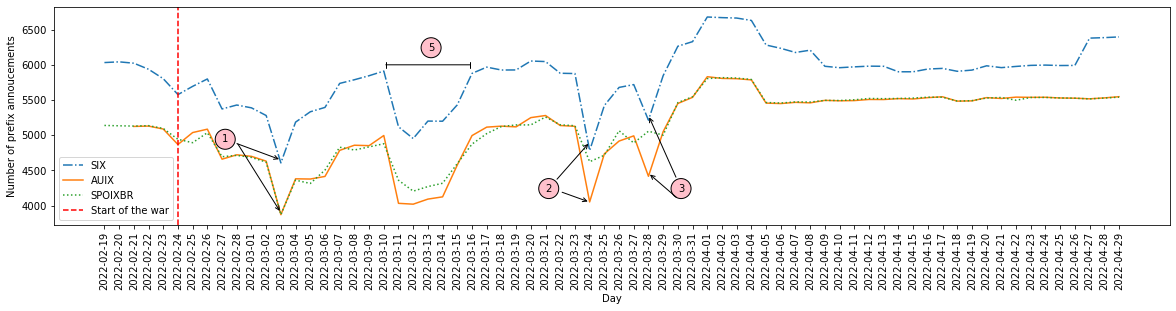

In [27]:
import matplotlib.pyplot as plt
f = plt.figure()
# plt.title('Ukrainian Prefix Annoucements')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of prefix annoucements')
# plt.plot(list(ua['amsix'].keys()), list(ua['amsix'].values()), label = 'AMSIX')
plt.plot(list(ua['six'].keys()), list(ua['six'].values()), label = 'SIX', linestyle = 'dashdot')
plt.plot(list(ua['auix'].keys()), list(ua['auix'].values()), label = 'AUIX')
plt.plot(list(ua['spoixbr'].keys()), list(ua['spoixbr'].values()), label = 'SPOIXBR', linestyle = 'dotted')
# plt.plot(list(ru['six'].keys()), list(ru['six'].values()), label = 'Russia')
# plt.plot(list(rest['amsix'].keys()), list(rest['amsix'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.annotate('1', xy=('2022-03-03', 4650), xytext=('2022-02-27', 4900), arrowprops=dict(arrowstyle='->'), bbox=dict(boxstyle='circle', pad=0.5, fc='pink'))
plt.annotate('', xy=('2022-03-03', 3900), xytext=('2022-02-28', 4900), arrowprops=dict(arrowstyle='->'))
plt.annotate('', xy=('2022-03-10', 6000), xytext=('2022-03-16', 6000), arrowprops={'arrowstyle': '|-|,widthA=0.3,widthB=0.3'})
plt.annotate('5', xy=('2022-03-13', 6200), bbox=dict(boxstyle='circle', pad=0.5, fc='pink'))
plt.annotate('2', xy=('2022-03-24', 4900), xytext=('2022-03-21', 4200), arrowprops=dict(arrowstyle='->'), bbox=dict(boxstyle='circle', pad=0.5, fc='pink'))
plt.annotate('', xy=('2022-03-24', 4050), xytext=('2022-03-22', 4200), arrowprops=dict(arrowstyle='->'))
plt.annotate('3', xy=('2022-03-28', 5280), xytext=('2022-03-30', 4200), arrowprops=dict(arrowstyle='->'), bbox=dict(boxstyle='circle', pad=0.5, fc='pink'))
plt.annotate('', xy=('2022-03-28', 4460), xytext=('2022-03-30', 4100), arrowprops=dict(arrowstyle='->'))
plt.legend()

# AMSIX

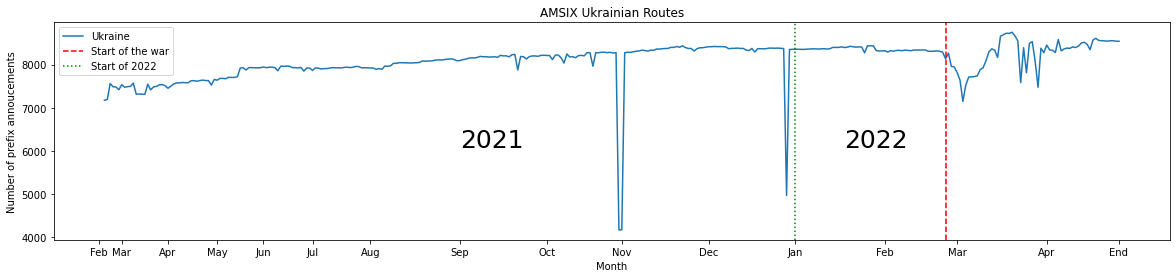

In [144]:
import matplotlib.pyplot as plt
ticks = ['2021-02-13', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01']
labels = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'End']
f = plt.figure()
plt.title('AMSIX Ukrainian Routes')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks([-2, 6,22,39,55,72,92, 123,153,179, 209, 239, 270, 295, 326, 351], labels, rotation=0)
plt.xlabel('Month')
plt.ylabel('Number of prefix annoucements')
plt.plot(list(ua['amsix'].keys()), list(ua['amsix'].values()), label = 'Ukraine')
# plt.plot(list(ru['six'].keys()), list(ru['six'].values()), label = 'Russia')
# plt.plot(list(rest['amsix'].keys()), list(rest['amsix'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.axvline(x='2022-01-01', color='green', linestyle='dotted', label='Start of 2022')
plt.annotate('2021', xy=('2021-09-01', 6100), fontsize=25)
plt.annotate('2022', xy=('2022-01-18', 6100), fontsize=25)

plt.legend()


# LINX

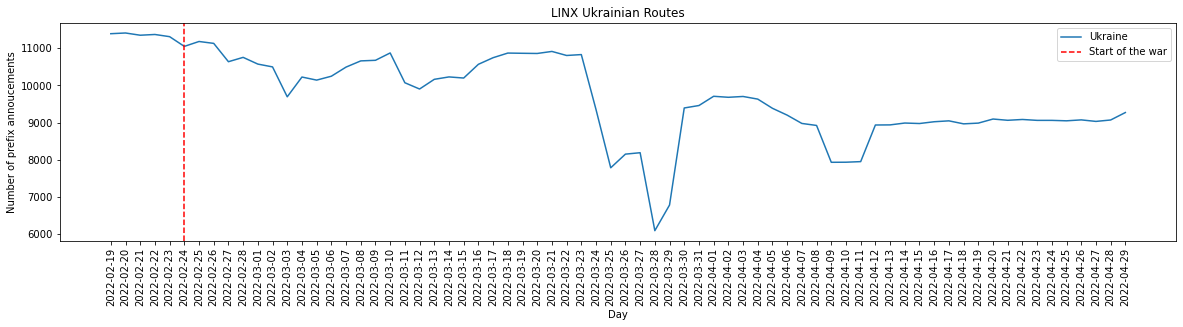

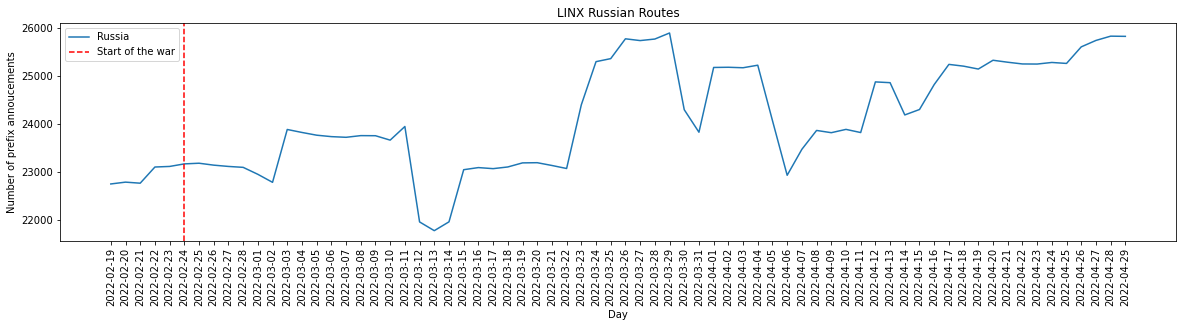

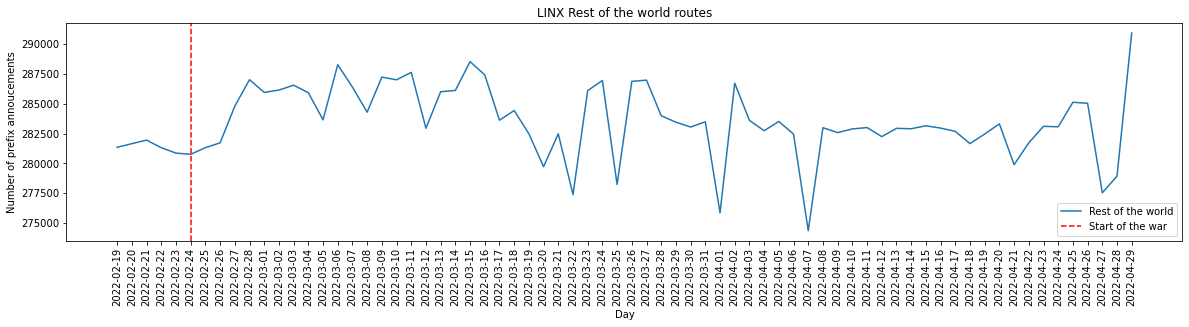

In [39]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.title('LINX Ukrainian Routes')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of prefix annoucements')
plt.plot(list(ua['linx'].keys()), list(ua['linx'].values()), label = 'Ukraine')
# plt.plot(list(ru['six'].keys()), list(ru['six'].values()), label = 'Russia')
# plt.plot(list(rest['amsix'].keys()), list(rest['amsix'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.legend()

f = plt.figure()
plt.title('LINX Russian Routes')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of prefix annoucements')
# plt.plot(list(ua['amsix'].keys()), list(ua['amsix'].values()), label = 'Ukraine')
plt.plot(list(ru['linx'].keys()), list(ru['linx'].values()), label = 'Russia')
# plt.plot(list(rest['amsix'].keys()), list(rest['amsix'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.legend()

f = plt.figure()
plt.title('LINX Rest of the world routes')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of prefix annoucements')
# plt.plot(list(ua['amsix'].keys()), list(ua['amsix'].values()), label = 'Ukraine')
# plt.plot(list(ru['six'].keys()), list(ru['six'].values()), label = 'Russia')
plt.plot(list(rest['linx'].keys()), list(rest['linx'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.legend()

# SIX

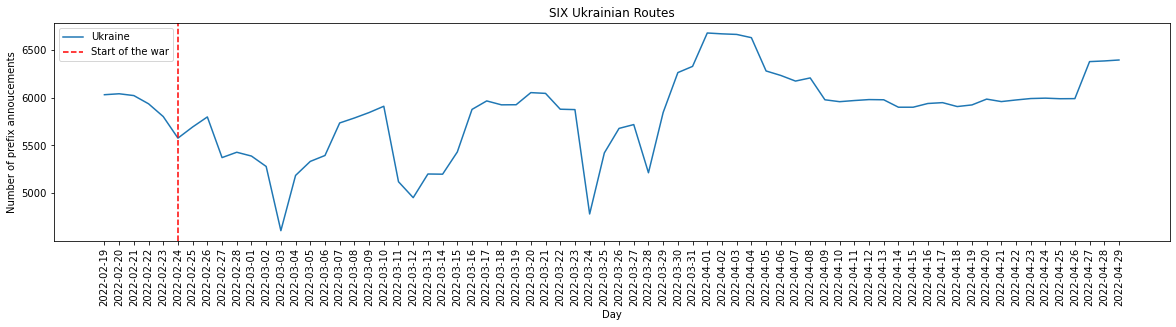

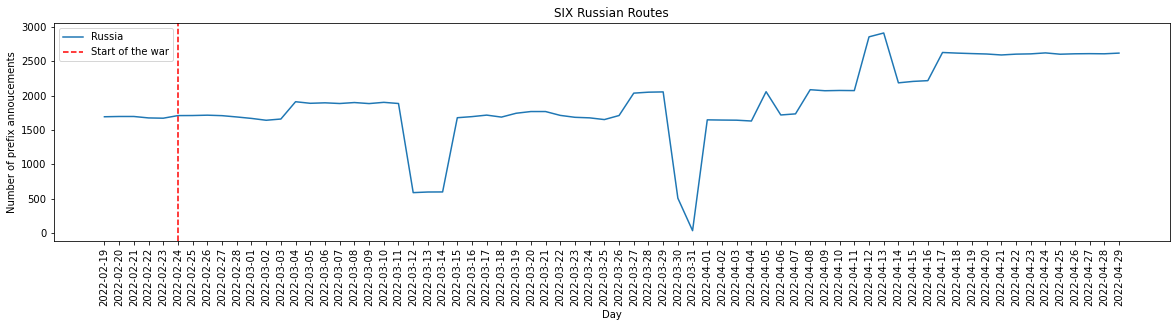

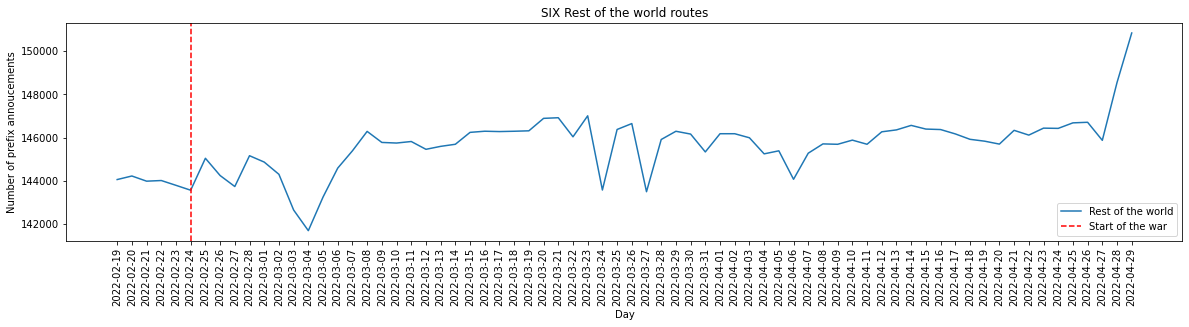

In [40]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.title('SIX Ukrainian Routes')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of prefix annoucements')
plt.plot(list(ua['six'].keys()), list(ua['six'].values()), label = 'Ukraine')
# plt.plot(list(ru['six'].keys()), list(ru['six'].values()), label = 'Russia')
# plt.plot(list(rest['amsix'].keys()), list(rest['amsix'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.legend()

f = plt.figure()
plt.title('SIX Russian Routes')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of prefix annoucements')
# plt.plot(list(ua['amsix'].keys()), list(ua['amsix'].values()), label = 'Ukraine')
plt.plot(list(ru['six'].keys()), list(ru['six'].values()), label = 'Russia')
# plt.plot(list(rest['amsix'].keys()), list(rest['amsix'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.legend()

f = plt.figure()
plt.title('SIX Rest of the world routes')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of prefix annoucements')
# plt.plot(list(ua['amsix'].keys()), list(ua['amsix'].values()), label = 'Ukraine')
# plt.plot(list(ru['six'].keys()), list(ru['six'].values()), label = 'Russia')
plt.plot(list(rest['six'].keys()), list(rest['six'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.legend()

# AUIX

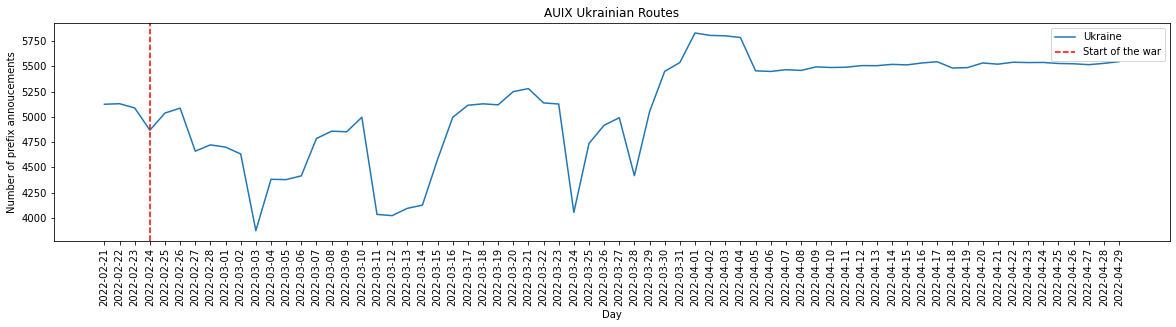

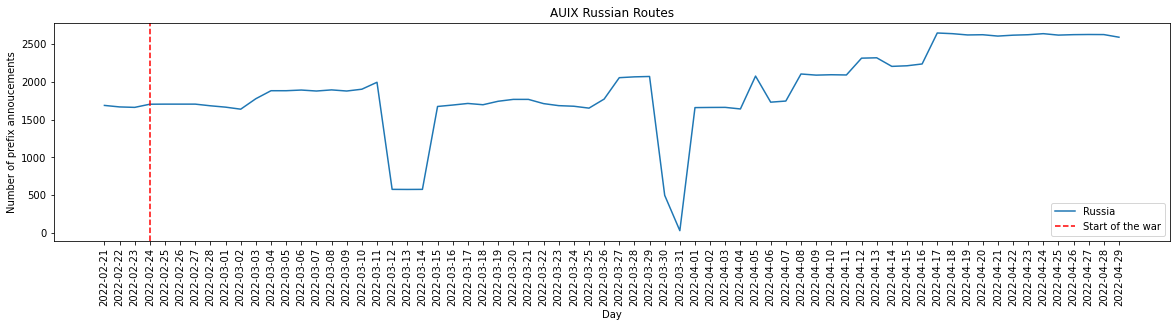

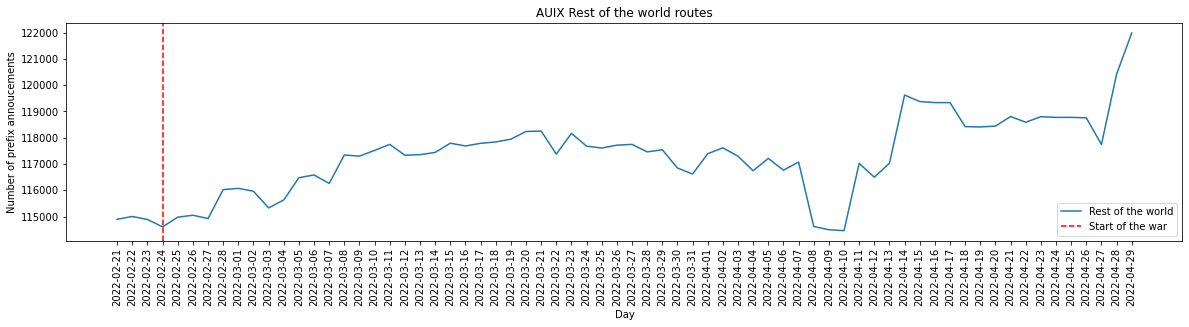

In [41]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.title('AUIX Ukrainian Routes')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of prefix annoucements')
plt.plot(list(ua['auix'].keys()), list(ua['auix'].values()), label = 'Ukraine')
# plt.plot(list(ru['six'].keys()), list(ru['six'].values()), label = 'Russia')
# plt.plot(list(rest['amsix'].keys()), list(rest['amsix'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.legend()

f = plt.figure()
plt.title('AUIX Russian Routes')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of prefix annoucements')
# plt.plot(list(ua['amsix'].keys()), list(ua['amsix'].values()), label = 'Ukraine')
plt.plot(list(ru['auix'].keys()), list(ru['auix'].values()), label = 'Russia')
# plt.plot(list(rest['amsix'].keys()), list(rest['amsix'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.legend()

f = plt.figure()
plt.title('AUIX Rest of the world routes')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of prefix annoucements')
# plt.plot(list(ua['amsix'].keys()), list(ua['amsix'].values()), label = 'Ukraine')
# plt.plot(list(ru['six'].keys()), list(ru['six'].values()), label = 'Russia')
plt.plot(list(rest['auix'].keys()), list(rest['auix'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.legend()

# SPOIXBR

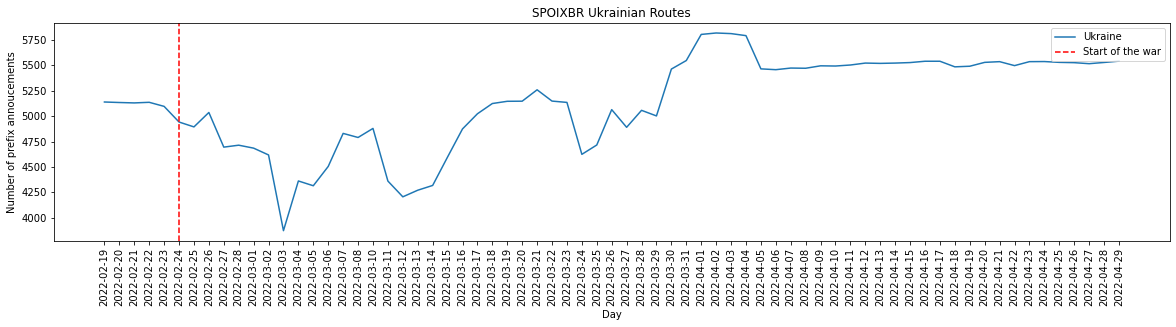

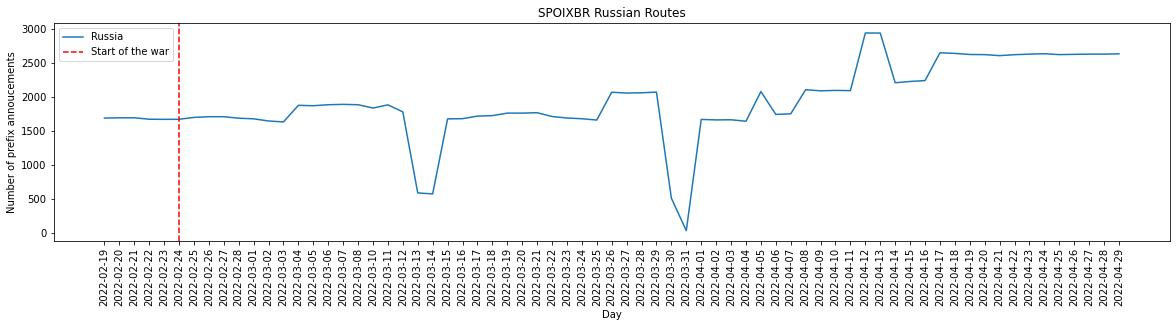

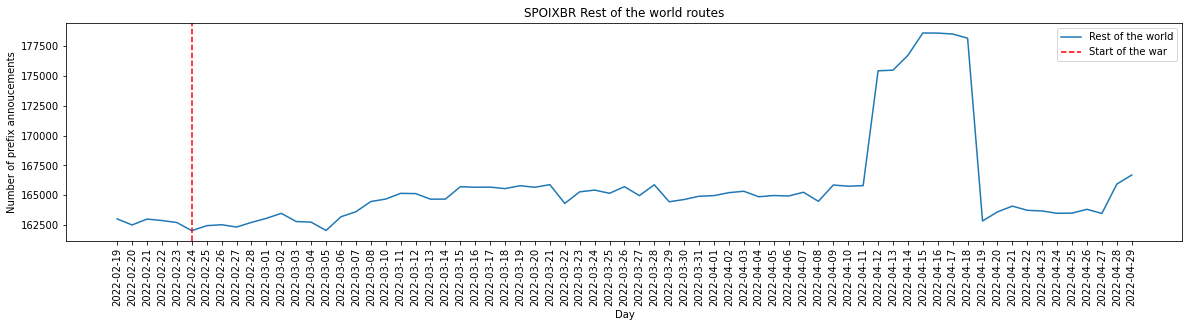

In [42]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.title('SPOIXBR Ukrainian Routes')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of prefix annoucements')
plt.plot(list(ua['spoixbr'].keys()), list(ua['spoixbr'].values()), label = 'Ukraine')
# plt.plot(list(ru['six'].keys()), list(ru['six'].values()), label = 'Russia')
# plt.plot(list(rest['amsix'].keys()), list(rest['amsix'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.legend()

f = plt.figure()
plt.title('SPOIXBR Russian Routes')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of prefix annoucements')
# plt.plot(list(ua['amsix'].keys()), list(ua['amsix'].values()), label = 'Ukraine')
plt.plot(list(ru['spoixbr'].keys()), list(ru['spoixbr'].values()), label = 'Russia')
# plt.plot(list(rest['amsix'].keys()), list(rest['amsix'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.legend()

f = plt.figure()
plt.title('SPOIXBR Rest of the world routes')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of prefix annoucements')
# plt.plot(list(ua['amsix'].keys()), list(ua['amsix'].values()), label = 'Ukraine')
# plt.plot(list(ru['six'].keys()), list(ru['six'].values()), label = 'Russia')
plt.plot(list(rest['spoixbr'].keys()), list(rest['spoixbr'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.legend()

# Offline days of each Ukrainian AS

In [5]:
# Get UA Offline days count
def upd(key):
    for v in ua[key].keys():
        if v not in data.as_origin.values:
                ua[key][v] += 1
                
# df['as_path_len']=df['AS_PATH'].apply(lambda x: len(str(x).split()))
# df=df.sort_values('as_path_len', ascending=True)
df = pd.read_csv('Dataset/UA/2022-02-21_rtable_ALICE_auix.csv')
df = df.drop_duplicates(subset=['as_origin'], keep='first')
auix = df.as_origin.values

df = pd.read_csv('Dataset/UA/2022-02-19_rtable_ALICE_linx.csv')
df = df.drop_duplicates(subset=['as_origin'], keep='first')
linx = df.as_origin.values

df = pd.read_csv('Dataset/UA/2022-02-19_rtable_ALICERS_amsix.csv')
df = df.drop_duplicates(subset=['as_origin'], keep='first')
amsix = df.as_origin.values

df = pd.read_csv('Dataset/UA/2022-02-19_rtable_BIRD_poaixbr.csv')
df = df.drop_duplicates(subset=['as_origin'], keep='first')
poaixbr = df.as_origin.values

df = pd.read_csv('Dataset/UA/2022-02-19_rtable_BIRD_spoixbr.csv')
df = df.drop_duplicates(subset=['as_origin'], keep='first')
spoixbr = df.as_origin.values

df = pd.read_csv('Dataset/UA/2022-02-19_rtable_TXT_six.csv')
df = df.drop_duplicates(subset=['as_origin'], keep='first')
six = df.as_origin.values

df = pd.read_csv('Dataset/UA/2022-02-18_rtable_ALICE_decix.csv')
df = df.drop_duplicates(subset=['as_origin'], keep='first')
decix = df.as_origin.values

# print(len(auix), len(linx), len(amsix), len(poaixbr), len(spoixbr), len(six))
             
path = 'Dataset/UA'
ua = {'auix' : dict.fromkeys(auix, 0), 'linx' : dict.fromkeys(linx, 0), 'decix' : dict.fromkeys(decix, 0), 'amsix' : dict.fromkeys(amsix, 0), 'poaixbr' : dict.fromkeys(poaixbr, 0), 'spoixbr' : dict.fromkeys(spoixbr, 0), 'six' : dict.fromkeys(six, 0)}
   
for f in os.listdir(path)[1871:]:
    if '.csv' in f:
#         print(f)
        try:
                data = pd.read_csv(path + '/' + f, usecols = ['as_origin'])
        except EmptyDataError:
            continue
    if '_six' in f:
        upd('six')
    elif '_auix' in f:
        upd('auix')
    elif '_linx' in f:
        upd('linx')
    elif '_amsix' in f:
        upd('amsix')
    elif '_decix' in f:
        upd('decix')
    elif '_poaixbr' in f:
        upd('poaixbr')
    elif '_auix' in f:
        upd('spoixbr')
# import pickle
# with open('UAOfflineDaysCount', 'wb') as handle:
#     pickle.dump(ua, handle)
print("DONE")

DONE


In [25]:
print(sorted(ua['six'].items(), key = lambda item : item[1], reverse = True))

[(57442, 68), (206907, 68), (211195, 68), (202483, 67), (49662, 66), (210069, 66), (31447, 65), (31069, 64), (35714, 64), (51794, 64), (21096, 63), (43223, 63), (47651, 63), (49631, 63), (49817, 63), (56824, 63), (62028, 63), (25029, 62), (34877, 62), (49465, 62), (208194, 62), (210526, 62), (212542, 62), (43554, 61), (48730, 61), (58054, 61), (205962, 61), (209074, 61), (12662, 60), (24881, 60), (34092, 60), (57924, 60), (34579, 59), (43124, 59), (44487, 59), (21029, 58), (25015, 58), (29443, 58), (30954, 58), (44750, 58), (47513, 58), (48422, 58), (56812, 58), (203149, 58), (205048, 58), (212621, 58), (24610, 57), (42222, 57), (60746, 57), (197253, 57), (203430, 56), (35319, 55), (57025, 55), (57864, 55), (204608, 55), (47788, 54), (56439, 54), (61117, 54), (208494, 54), (210169, 54), (211062, 54), (62427, 53), (39916, 52), (59768, 52), (203654, 52), (204289, 52), (204485, 51), (31531, 49), (25256, 48), (207416, 48), (209117, 48), (198633, 47), (34323, 46), (45042, 46), (51511, 46), 

# Lost Ukrainian ASes

In [6]:
path = 'Dataset/UA'

for ixp in ua.keys():
    for f in os.listdir(path)[-6:]:
        if '_' + ixp in f:
            data = pd.read_csv(path + '/' + f, usecols = ['as_origin'])
#             print(f)
            
    i = 0
    for v in ua[ixp].keys():
        if v not in data.as_origin.values:
            i += 1
#             print(ixp, v, ua[ixp][v], ' LOST')
#         ua[ixp][v][1] = 
    print(ixp, 'TOTAL LOST ', i, ' out of ', len(ua[ixp].keys()))

auix TOTAL LOST  94  out of  1016
linx TOTAL LOST  259  out of  1335
decix TOTAL LOST  573  out of  1675
amsix TOTAL LOST  165  out of  1571
poaixbr TOTAL LOST  0  out of  0
spoixbr TOTAL LOST  94  out of  1021
six TOTAL LOST  103  out of  1096


# Offline days of each Russian AS

In [ ]:
# Get RU Offline days count
def upd(key):
    for v in ru[key].keys():
        if v not in data.as_origin.values:
                ru[key][v] += 1
             
# df['as_path_len']=df['AS_PATH'].apply(lambda x: len(str(x).split()))
# df=df.sort_values('as_path_len', ascending=True)
df = pd.read_csv('Dataset/RU/2022-02-21_rtable_ALICE_auix.csv')
df = df.drop_duplicates(subset=['as_origin'], keep='first')
auix = df.as_origin.values

df = pd.read_csv('Dataset/RU/2022-02-19_rtable_ALICE_linx.csv')
df = df.drop_duplicates(subset=['as_origin'], keep='first')
linx = df.as_origin.values

df = pd.read_csv('Dataset/RU/2022-02-19_rtable_ALICERS_amsix.csv')
df = df.drop_duplicates(subset=['as_origin'], keep='first')
amsix = df.as_origin.values

df = pd.read_csv('Dataset/RU/2022-02-19_rtable_BIRD_poaixbr.csv')
df = df.drop_duplicates(subset=['as_origin'], keep='first')
poaixbr = df.as_origin.values

df = pd.read_csv('Dataset/RU/2022-02-19_rtable_BIRD_spoixbr.csv')
df = df.drop_duplicates(subset=['as_origin'], keep='first')
spoixbr = df.as_origin.values

df = pd.read_csv('Dataset/RU/2022-02-19_rtable_TXT_six.csv')
df = df.drop_duplicates(subset=['as_origin'], keep='first')
six = df.as_origin.values

df = pd.read_csv('Dataset/RU/2022-02-18_rtable_ALICE_decix.csv')
df = df.drop_duplicates(subset=['as_origin'], keep='first')
decix = df.as_origin.values

# print(len(auix), len(linx), len(amsix), len(poaixbr), len(spoixbr), len(six))
            
path = 'Dataset/RU'
ru = {'auix' : dict.fromkeys(auix, 0), 'linx' : dict.fromkeys(linx, 0), 'decix' : dict.fromkeys(decix, 0), 'amsix' : dict.fromkeys(amsix, 0), 'poaixbr' : dict.fromkeys(poaixbr, 0), 'spoixbr' : dict.fromkeys(spoixbr, 0), 'six' : dict.fromkeys(six, 0)}
   
for f in os.listdir(path)[1871:]:
    if '.csv' in f:
#         print(f)
        try:
                data = pd.read_csv(path + '/' + f, usecols = ['as_origin'])
        except EmptyDataError:
            continue
    if '_six' in f:
        upd('six')
    elif '_auix' in f:
        upd('auix')
    elif '_linx' in f:
        upd('linx')
    elif '_amsix' in f:
        upd('amsix')
    elif '_poaixbr' in f:
        upd('poaixbr')
    elif '_auix' in f:
        upd('spoixbr')
# import pickle
# with open('RUOfflineDaysCount', 'wb') as handle:
#     pickle.dump(ru, handle)
print("DONE")

In [6]:
print(sorted(ru['amsix'].items(), key = lambda item : item[1], reverse = True))

[(198601, 64), (200686, 64), (29572, 63), (41745, 62), (6698, 61), (43209, 61), (47399, 61), (24924, 60), (39676, 60), (35022, 59), (50416, 59), (50640, 59), (57865, 59), (212288, 59), (48009, 58), (199922, 58), (203407, 58), (211076, 58), (51791, 57), (196673, 57), (57460, 56), (59603, 56), (203093, 56), (210113, 56), (3285, 55), (57298, 55), (201092, 55), (61305, 54), (42023, 53), (197553, 53), (205216, 53), (206396, 52), (43527, 51), (57281, 51), (34829, 48), (44324, 48), (59601, 48), (47854, 47), (59558, 47), (212494, 47), (49643, 46), (47577, 45), (48122, 44), (48723, 44), (49965, 43), (197349, 43), (197489, 43), (200833, 43), (209448, 43), (51789, 42), (198626, 42), (208058, 42), (211507, 41), (199757, 37), (209794, 37), (43246, 36), (211530, 36), (212214, 36), (200065, 35), (210931, 35), (42911, 34), (50727, 34), (59673, 33), (21008, 32), (60862, 32), (62413, 32), (206955, 31), (47694, 30), (59837, 30), (8853, 29), (30855, 29), (49575, 29), (56829, 29), (35813, 27), (50498, 27),

# Lost Russian ASes

In [18]:
path = 'Dataset/RU'

for ixp in ru.keys():
#     print(ixp)
    for f in os.listdir(path)[-12:-6]:
        if '_' + ixp in f:
            data = pd.read_csv(path + '/' + f, usecols = ['as_origin'])
#             print(f)
            
    i = 0
    for v in ru[ixp].keys():
        if v not in data.as_origin.values:
            i += 1
#             print(ixp, v, ua[ixp][v], ' LOST')
#         ru[ixp][v][1] = 
    print(ixp, 'TOTAL LOST ', i, ' out of ', len(ru[ixp].keys()))

auix TOTAL LOST  65  out of  415
linx TOTAL LOST  106  out of  2886
decix TOTAL LOST  1857  out of  4728
amsix TOTAL LOST  121  out of  3749
poaixbr TOTAL LOST  0  out of  2
spoixbr TOTAL LOST  66  out of  419
six TOTAL LOST  67  out of  421


# Analyzing AS Neighbors

## Notes
Megafon (AS 31133) has not been affected by the LINX ban, there are still ~3 routes which use it as a hop in AS_PATH.  
Rostelecom (AS 12389) has not been affected, on the contrary the number of prefixes that go through it increased in April.

In [28]:
ua = {'auix' : OrderedDict(), 'linx' : OrderedDict(), 'amsix' : OrderedDict(), 'spoixbr' : OrderedDict(), 'six' : OrderedDict()}
ru = {'auix' : OrderedDict(), 'linx' : OrderedDict(), 'amsix' : OrderedDict(), 'spoixbr' : OrderedDict(), 'six' : OrderedDict()}
asndb=pd.read_csv('ASNDB.csv')
asndb=asndb.set_index('asn')
path = os.getcwd() + '/Dataset'
dates = []
sizes = []
for f in os.listdir(path)[1871:]:#1871
#         if f.startswith(date):
#     print('Working on: ', f)
    if '.csv' in f:
        try:
            data = pd.read_csv(path + '\\' + f, usecols = ['NETWORK', 'AS_PATH', 'as_origin', 'as_neigh'])
        except EmptyDataError:
            continue
    else:
        continue
    data['asn'] = data['as_neigh']
    data = data.set_index('asn')
    try:
        data = data.join(asndb)
    except ValueError:
        continue
    date = f[:10]
    data = data.drop_duplicates(subset=['as_neigh'], keep='first')
    size = data[data['cc'] =='RU'].shape[0]
    if 'auix' in f:
        ru['auix'][date] = size
    elif 'linx' in f:
        ru['linx'][date] = size
    elif 'amsix' in f:
        ru['amsix'][date] = size
    elif 'spoixbr' in f:
        ru['spoixbr'][date] = size
    elif 'six' in f:
        ru['six'][date] = size
    
    size = data[data['cc'] =='UA'].shape[0]
    if 'auix' in f:
        ua['auix'][date] = size
    elif 'linx' in f:
        ua['linx'][date] = size
    elif 'amsix' in f:
        ua['amsix'][date] = size
    elif 'spoixbr' in f:
        ua['spoixbr'][date] = size
    elif 'six' in f:
        ua['six'][date] = size

print("DONE")

DONE


In [34]:
import pickle
with open('RUneighcount', 'wb') as handle:
    pickle.dump(ru, handle)


with open('UAneighcount', 'wb') as handle:
    pickle.dump(ua, handle)

In [7]:
 def makePlot(ixp):
    import matplotlib.pyplot as plt
    f = plt.figure()
    plt.title(ixp.upper() + ' Ukrainian Direct connections')
    f.set_figwidth(20)
    f.set_figheight(4)
    plt.xticks(rotation=90)
    plt.xlabel('Day')
    plt.ylabel('Number of unique as_neighbours')
    plt.plot(list(ua[ixp].keys()), list(ua[ixp].values()), label = 'Ukraine')
    # plt.plot(list(ru['six'].keys()), list(ru['six'].values()), label = 'Russia')
    # plt.plot(list(rest['amsix'].keys()), list(rest['amsix'].values()), label = 'Rest of the world')
    plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
    plt.legend()

    f = plt.figure()
    plt.title(ixp.upper() + ' Russian Direct connections')
    f.set_figwidth(20)
    f.set_figheight(4)
    plt.xticks(rotation=90)
    plt.xlabel('Day')
    plt.ylabel('Number of unique as_neighbours')
    # plt.plot(list(ua['amsix'].keys()), list(ua['amsix'].values()), label = 'Ukraine')
    plt.plot(list(ru[ixp].keys()), list(ru[ixp].values()), label = 'Russia')
    # plt.plot(list(rest['amsix'].keys()), list(rest['amsix'].values()), label = 'Rest of the world')
    plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
    plt.legend()

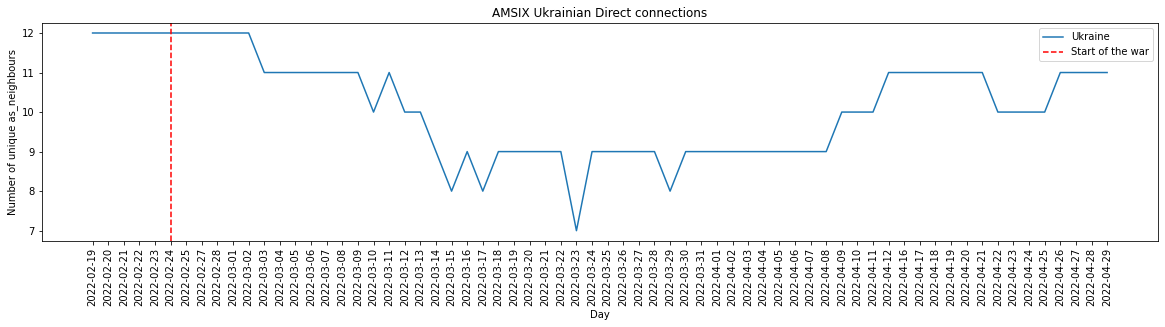

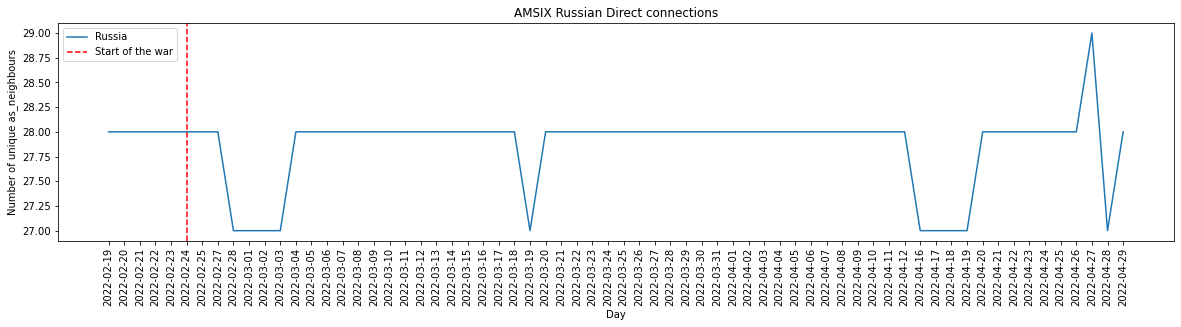

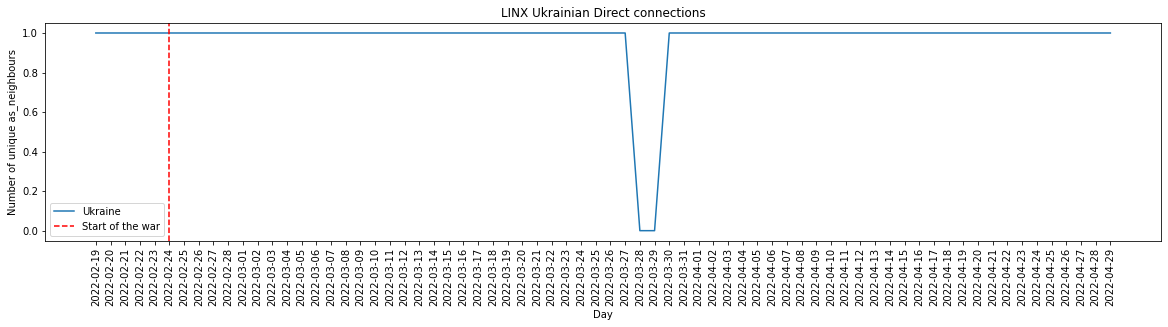

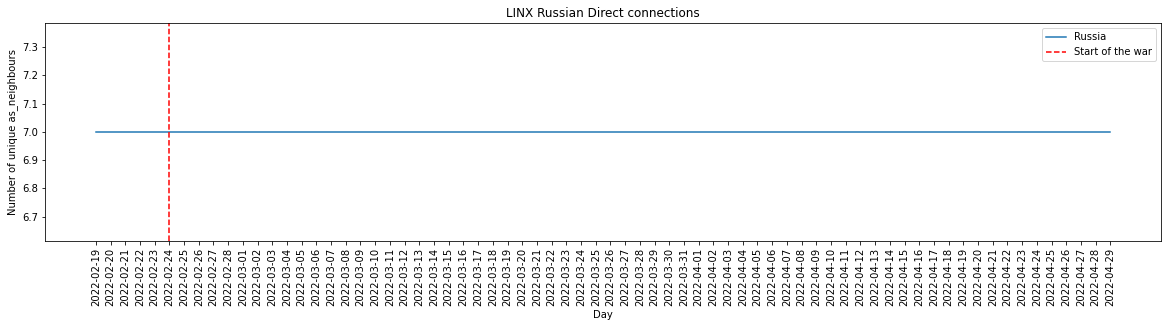

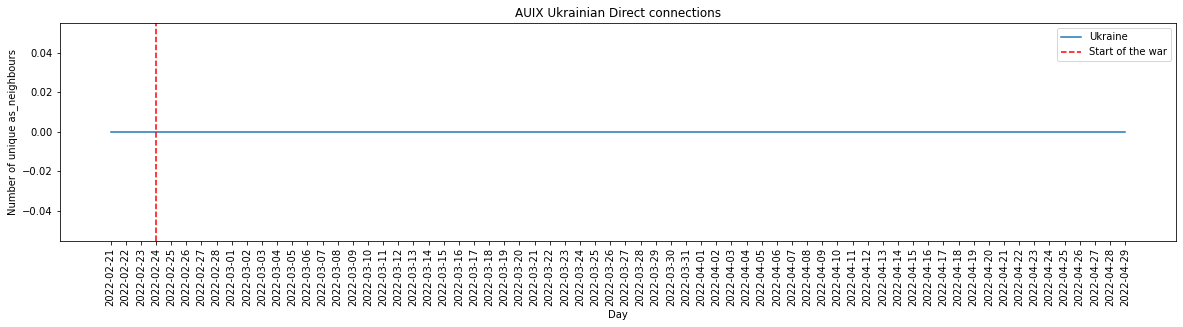

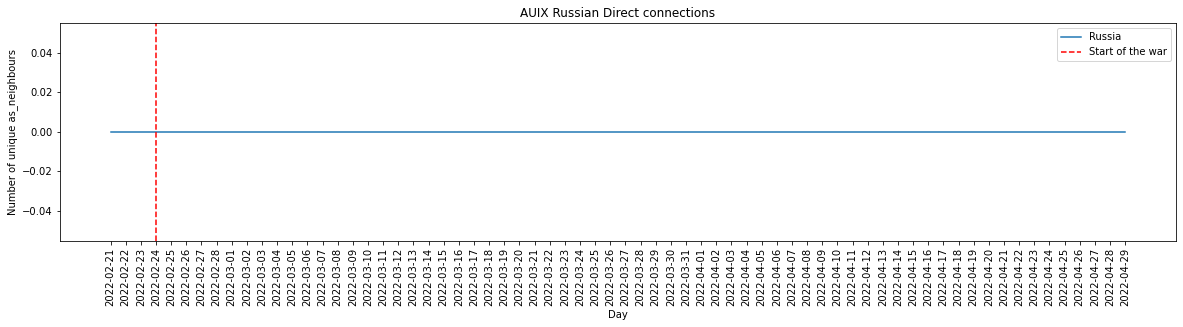

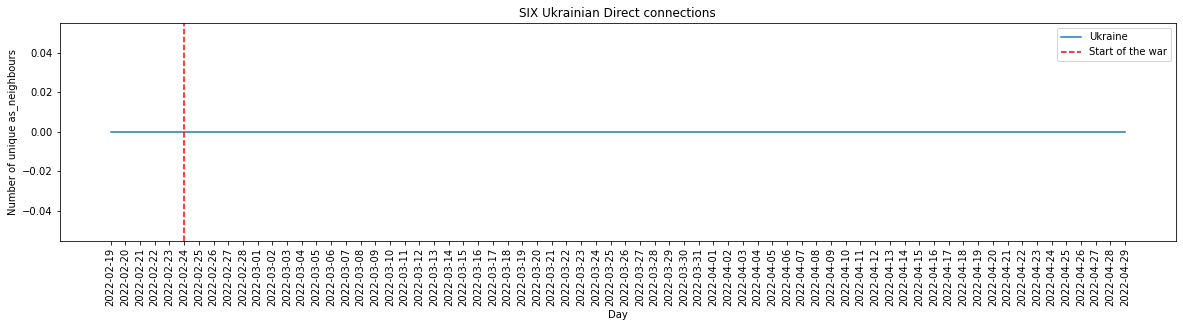

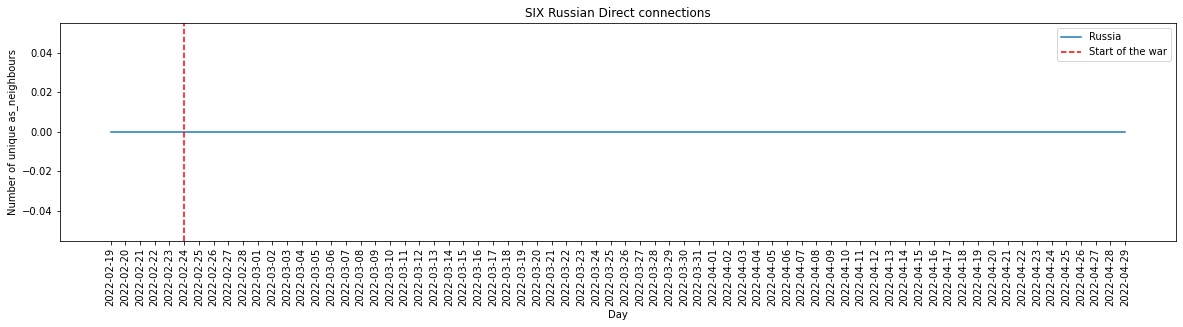

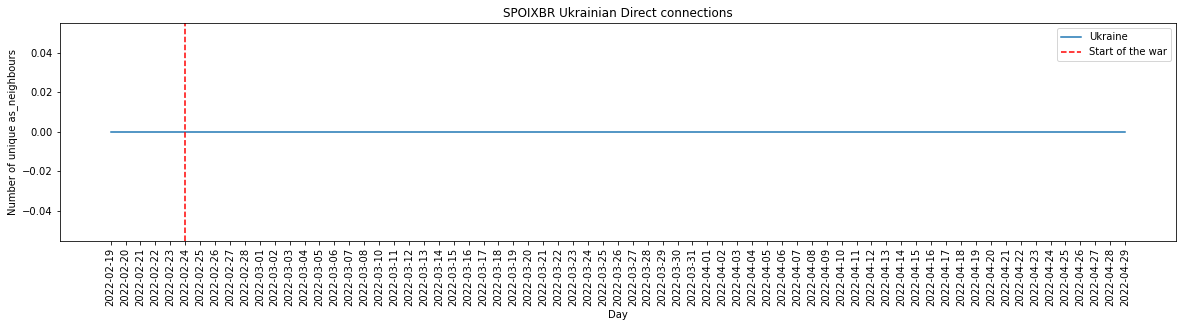

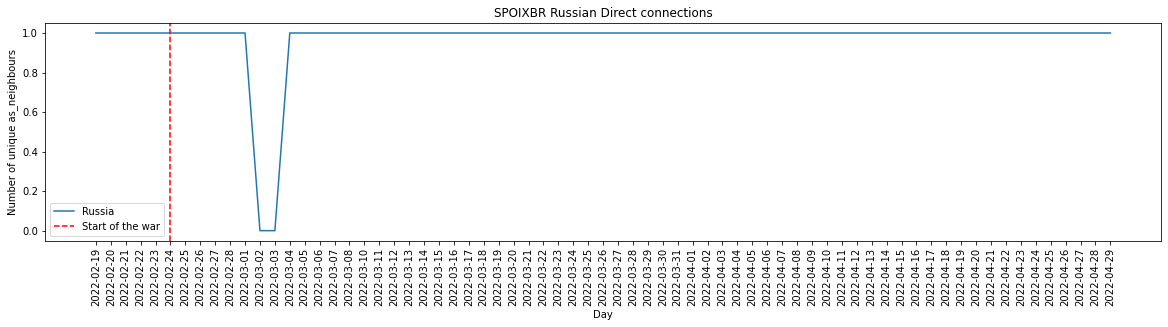

In [10]:
makePlot('amsix')
makePlot('linx')
makePlot('auix')
makePlot('six')
makePlot('spoixbr')

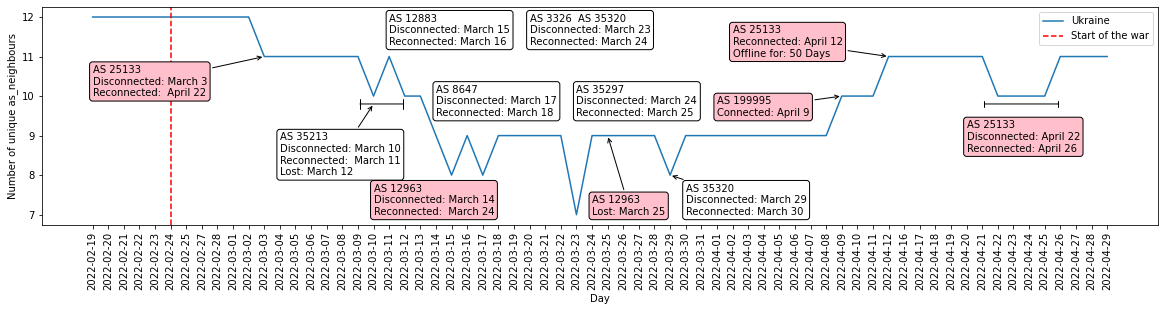

In [29]:
import matplotlib.pyplot as plt
f = plt.figure()
# plt.title('AMSIX Ukrainian neighbours')
f.set_figwidth(20)
f.set_figheight(4)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Number of unique as_neighbours')
plt.plot(list(ua['amsix'].keys()), list(ua['amsix'].values()), label = 'Ukraine')
# plt.plot(list(ru['six'].keys()), list(ru['six'].values()), label = 'Russia')
# plt.plot(list(rest['amsix'].keys()), list(rest['amsix'].values()), label = 'Rest of the world')
plt.axvline(x='2022-02-24', color='red', linestyle='--', label='Start of the war')
plt.annotate('AS 25133\nDisconnected: March 3\nReconnected:  April 22', xy=('2022-03-03', 11), xytext=('2022-02-19', 10), arrowprops=dict(arrowstyle='->'), 
             bbox=dict(boxstyle='round', fc='pink'))
plt.annotate('', xy=('2022-03-09', 9.8), xytext=('2022-03-12', 9.8), arrowprops={'arrowstyle': '|-|,widthA=0.5,widthB=0.5', })
plt.annotate('AS 35213\nDisconnected: March 10\nReconnected:  March 11\nLost: March 12', xy=('2022-03-10', 9.8), xytext=('2022-03-04', 8), arrowprops=dict(arrowstyle='->'),
             bbox=dict(boxstyle='round', fc='none'))
plt.annotate('AS 12963\nDisconnected: March 14\nReconnected:  March 24', xy=('2022-03-14', 9), xytext=('2022-03-10', 7),  
bbox=dict(boxstyle='round', fc='pink'))
plt.annotate('AS 12883\nDisconnected: March 15\nReconnected: March 16', xy=('2022-03-15', 8), xytext=('2022-03-11', 11.3),  
bbox=dict(boxstyle='round', fc='none'))
# plt.annotate('', xy=('2022-03-15', 9), xytext=('2022-03-16', 9), arrowprops={'arrowstyle': '|-|,widthA=0.3,widthB=0.3', })
plt.annotate('AS 8647\nDisconnected: March 17\nReconnected: March 18', xy=('2022-03-17', 8), xytext=('2022-03-14', 9.5),
bbox=dict(boxstyle='round', fc='none'))
plt.annotate('AS 3326  AS 35320\nDisconnected: March 23\nReconnected: March 24', xy=('2022-03-23', 7), xytext=('2022-03-20', 11.3),
bbox=dict(boxstyle='round', fc='none'))
plt.annotate('AS 35297\nDisconnected: March 24\nReconnected: March 25', xy=('2022-03-23', 8), xytext=('2022-03-23', 9.5), 
bbox=dict(boxstyle='round', fc='none'))
plt.annotate('AS 12963\nLost: March 25', xy=('2022-03-25', 9), xytext=('2022-03-24', 7), arrowprops=dict(arrowstyle='->'), 
bbox=dict(boxstyle='round', fc='pink'))
plt.annotate('AS 35320\nDisconnected: March 29\nReconnected: March 30', xy=('2022-03-29', 8), xytext=('2022-03-30', 7), arrowprops=dict(arrowstyle='->'), 
bbox=dict(boxstyle='round', fc='none'))
plt.annotate('AS 199995\nConnected: April 9', xy=('2022-04-09', 10), xytext=('2022-04-01', 9.5), arrowprops=dict(arrowstyle='->'), 
bbox=dict(boxstyle='round', fc='pink'))
plt.annotate('AS 25133\nReconnected: April 12\nOffline for: 50 Days', xy=('2022-04-12', 11), xytext=('2022-04-02', 11), arrowprops=dict(arrowstyle='->'), 
bbox=dict(boxstyle='round', fc='pink'))
plt.annotate('', xy=('2022-04-21', 9.8), xytext=('2022-04-26', 9.8), arrowprops={'arrowstyle': '|-|,widthA=0.3,widthB=0.3'})
plt.annotate('AS 25133\nDisconnected: April 22\nReconnected: April 26', xy=('2022-03-25', 9), xytext=('2022-04-20', 8.6),
bbox=dict(boxstyle='round', fc='pink'))
plt.legend()


# ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
#             xytext=(0, -20), textcoords='offset points')
# ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
#             xycoords='data', textcoords='data',
#             arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

In [245]:
asndb=pd.read_csv('ASNDB.csv')
asndb=asndb.set_index('asn')
d1 = pd.read_csv('Dataset/2022-04-08_rtable_ALICERS_amsix.csv') # Choose day to analyze
d2 = pd.read_csv('Dataset/2022-04-09_rtable_ALICERS_amsix.csv') # Choose day to analyze
d1['asn'] = d1['as_neigh']
d1 = d1.set_index('asn')
d1 = d1.join(asndb)
d1 = d1[d1['cc'] =='UA']
d1 = d1.drop_duplicates(subset=['as_neigh'], keep='first')
d2['asn'] = d2['as_neigh']
d2 = d2.set_index('asn')
d2 = d2.join(asndb)
d2 = d2[d2['cc'] =='UA']
d2 = d2.drop_duplicates(subset=['as_neigh'], keep='first')
print('DISCONNECT', d1.loc[~d1['as_neigh'].isin(d2.as_neigh.values)]['as_neigh'].to_string(index=False)) #DISCONNECT
print()
print('RECONNECT', d2.loc[~d2['as_neigh'].isin(d1.as_neigh.values)]['as_neigh'].to_string(index=False)) #RECONNECT

DISCONNECT Series([], )

RECONNECT asn
199995


# Attempt at analyzing AS Paths (OBSOLETE)

In [ ]:
asndb = pd.read_csv('ASNDB.csv')
def getCC(asn):
    r = asndb[asndb['asn'] == asn]['cc'].to_string(index = False)[1:]
    if len(r) > 2:
        r = None
    return r

def process(data):
    data['as_path_len']=data['AS_PATH'].apply(lambda x: len(str(x).split()))
    data=data.sort_values('as_path_len', ascending=True)
    data=data.drop_duplicates(subset=['NETWORK'], keep='first')
    data = data.set_index('as_origin')
    data['cc_path'] = data['AS_PATH'].apply(lambda x : str([getCC(int(asn)) for asn in str(x).split()]))
    return data
old = pd.read_csv('Dataset/RU/2022-02-19_rtable_ALICE_linx.csv')
old = process(old)
data = pd.read_csv('Dataset/RU/2022-02-25_rtable_ALICE_linx.csv')
data = process(data)
diff = pd.concat([old, data]).drop_duplicates(keep=False)
print(diff)
# print(old.shape[0])
# print(pd.concat([old['AS_PATH'],data['AS_PATH']]).drop_duplicates(keep=False).shape[0])


In [ ]:
# s = '1221 1212321 142131 523432'
# r = [getCC(x) for x in s.split()]
# print(str(s))
# print(data[['cc_path', 'AS_PATH']])
print(pd.concat([old['cc_path'],data['cc_path']]).drop_duplicates(keep=False))
# print(pd.concat([old['AS_PATH'],data['AS_PATH']]).drop_duplicates(keep=False))

# print(old['cc_path'])

In [45]:
data = pd.read_csv('Dataset/2022-02-19_rtable_ALICE_linx.csv')
# print(data.as_neigh.isin([59624]))
asndb=pd.read_csv('ASNDB.csv')
asndb=asndb.set_index('asn')
data['asn'] = data['as_neigh']
data = data.set_index('asn')
data = data.join(asndb)
# print(data)

In [ ]:
# RU FILE
# 23188 RU AS origins
# 19783 RU AS neighs

# ALL FILE
# data = data.drop_duplicates(subset=['as_neigh'], keep='first')
print(data[data['cc'] == 'UA'])
# print(data)

In [83]:
asndb = pd.read_csv('ASNDB.csv')
def getCC(asn):
    r = asndb[asndb['asn'] == asn]['cc'].to_string(index = False)[0:]
    if len(r) > 2:
        r = None
    return r

def process(data):
    data['as_path_len']=data['AS_PATH'].apply(lambda x: len(str(x).split()))
    data=data.sort_values('as_path_len', ascending=True)
    data=data.drop_duplicates(subset=['NETWORK'], keep='first')
#     data = data.set_index('NETWORK')
#     data['cc_path'] = data['AS_PATH'].parallel_apply(lambda x : str([getCC(int(asn)) for asn in str(x).split()]))
    return data
d1 = pd.read_csv('Dataset/UA/2022-02-19_rtable_ALICERS_amsix.csv')
d1 = process(d1)
d2 = pd.read_csv('Dataset/UA/2022-04-29_rtable_ALICERS_amsix.csv')
d2 = process(d2)
# Here we have all diferences - but dont know the day
# diff = pd.concat([old, data]).drop_duplicates(keep=False)
# print(diff)



# # Here I have what is in Day1 but not in Day2
# df=d1.loc[~((d1.NETWORK.isin(d2['NETWORK']))&(d1.AS_PATH.isin(d2['AS_PATH']))),:]
# print(len(df))
# just_d1=df
# df.head(5)

# Here I have what is in Day2 but not in Day1
df=d2.loc[~((d2.NETWORK.isin(d1['NETWORK']))&(d2.AS_PATH.isin(d1['AS_PATH']))),:]

df['cc_path_afterwar'] = df['AS_PATH'].apply(lambda x : str([getCC(int(asn)) for asn in str(x).split()]))
print(len(df))
display(df)



3568


C:\Users\crist\AppData\Local\Temp\ipykernel_11240\3709229561.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cc_path_afterwar'] = df['AS_PATH'].apply(lambda x : str([getCC(int(asn)) for asn in str(x).split()]))


,as_origin,NETWORK,as_neigh,AS_PATH,as_path_len,cc_path_afterwar
14660,49505,45.138.160.0/22,49505,49505,1,['RU']
14656,49505,45.136.180.0/22,49505,49505,1,['RU']
14645,49505,45.133.148.0/22,49505,49505,1,['RU']
14640,49505,45.131.96.0/22,49505,49505,1,['RU']
14637,49505,45.131.40.0/22,49505,49505,1,['RU']
...,...,...,...,...,...,...
1712,8775,195.69.157.0/24,3216,3216 29076 196691 196691 196691 196691 196691 ...,16,"['RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU..."
1711,8775,195.69.156.0/24,3216,3216 29076 196691 196691 196691 196691 196691 ...,16,"['RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU..."
1710,8775,195.69.156.0/22,3216,3216 29076 196691 196691 196691 196691 196691 ...,16,"['RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU..."
20459,61230,185.67.253.0/24,6939,6939 50509 196691 61230 61230 61230 61230 6123...,19,"['US', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU..."


In [84]:
# df = df.set_index('NETWORK')
# d1 = d1.set_index('NETWORK')
merge = df.join(d1, how='left', lsuffix='_prewar', rsuffix='_afterwar')
merge = merge.drop(['as_path_len_prewar', 'NETWORK_prewar', 'as_path_len_afterwar'], axis=1)

In [88]:
merge['cc_path_prewar'] = merge['AS_PATH_prewar'].apply(lambda x : str([getCC(int(asn)) for asn in str(x).split()]))
display(merge)
# print(len(df))

,as_origin_prewar,as_neigh_prewar,AS_PATH_prewar,cc_path_afterwar,as_origin_afterwar,NETWORK_afterwar,as_neigh_afterwar,AS_PATH_afterwar,cc_path_prewar
14660,49505,49505,49505,['RU'],50340.0,194.58.154.0/23,20764.0,20764 20764 50340,['RU']
14656,49505,49505,49505,['RU'],50340.0,193.47.44.0/22,20764.0,20764 20764 50340,['RU']
14645,49505,49505,49505,['RU'],NaN,NaN,NaN,NaN,['RU']
14640,49505,49505,49505,['RU'],50340.0,185.191.32.0/23,20764.0,20764 20764 50340,['RU']
14637,49505,49505,49505,['RU'],NaN,NaN,NaN,NaN,['RU']
...,...,...,...,...,...,...,...,...,...
1712,8775,3216,3216 29076 196691 196691 196691 196691 196691 ...,"['RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU...",8905.0,86.110.0.0/19,20764.0,20764 20764 20764 20764 8905 8905 8905,"['RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU..."
1711,8775,3216,3216 29076 196691 196691 196691 196691 196691 ...,"['RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU...",8905.0,84.21.64.0/19,20764.0,20764 20764 20764 20764 8905 8905 8905,"['RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU..."
1710,8775,3216,3216 29076 196691 196691 196691 196691 196691 ...,"['RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU...",8905.0,81.25.48.0/20,20764.0,20764 20764 39153 8905,"['RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU..."
20459,61230,6939,6939 50509 196691 61230 61230 61230 61230 6123...,"['US', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU...",201916.0,185.59.216.0/24,3216.0,3216 29226 201916,"['US', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU', 'RU..."


In [265]:
def process(data):
    data['as_path_len']=data['AS_PATH'].apply(lambda x: len(str(x).split()))
    data=data.sort_values('as_path_len', ascending=True)
    data=data.drop_duplicates(subset=['NETWORK'], keep='first')
#     data = data.set_index('NETWORK')
#     data['cc_path'] = data['AS_PATH'].parallel_apply(lambda x : str([getCC(int(asn)) for asn in str(x).split()]))
    return data
d1 = pd.read_csv('Dataset/UA/2022-02-19_rtable_ALICERS_amsix.csv')
d1 = process(d1)
d2 = pd.read_csv('Dataset/UA/2022-04-29_rtable_ALICERS_amsix.csv')
d2 = process(d2)

In [267]:
df=d2.loc[~((d2.NETWORK.isin(d1['NETWORK']))&(d2.AS_PATH.isin(d1['AS_PATH']))),:]
df=df.drop_duplicates(subset=['AS_PATH'], keep='first')
print(df)

      as_origin           NETWORK  as_neigh  \
359        3326  195.114.131.0/24      3326   
4816      35297   91.204.214.0/24     35297   
8065     199995   185.109.53.0/24    199995   
3031      15497    31.28.164.0/22     13249   
3117      15742   217.117.70.0/24      3326   
...         ...               ...       ...   
4722      34633   194.88.218.0/23     35297   
2608      13188  178.151.250.0/24     28917   
8024     198640   91.237.164.0/22      8732   
7043      51848  193.107.111.0/24     28917   
7878     197221   185.162.20.0/22     28917   

                                                AS_PATH  as_path_len  
359                                                3326            1  
4816                                              35297            1  
8065                                             199995            1  
3031                                        13249 15497            2  
3117                                         3326 15742            2  
...      

In [33]:
d1 = pd.read_csv('Dataset/UA/2022-03-13_rtable_ALICERS_amsix.csv')
d2 = pd.read_csv('Dataset/UA/2022-03-17_rtable_ALICERS_amsix.csv')
# pw = pd.read_csv('Dataset/UA/2022-02-19_rtable_ALICERS_amsix.csv')

In [41]:
# df=d2.loc[~((d2.NETWORK.isin(d1['NETWORK']))&(d2.AS_PATH.isin(d1['AS_PATH']))),:]
dfn = d2.loc[~d2['NETWORK'].isin(d1.NETWORK.values),:]
dfo = d2.loc[~d2['as_origin'].isin(d1.as_origin.values),:].drop_duplicates(subset=['as_origin'], keep='first')
# df = pd.merge(d2,d1, indicator=True, how='outer', on='NETWORK').query('_merge=="left_only"').drop('_merge', axis=1)
# df = dfn.loc[dfn['as_origin'].isin(dfo.as_origin.values)]
# display(dfo)
# display(pw.loc[pw['as_origin'].isin(dfo.as_origin.values)].drop_duplicates(subset=['as_origin'], keep='first').shape[0])
display(dfo.shape[0])

31

# Playground (irrelevant)

In [28]:
def ips(prefix):
    c = prefix.split('/')[1]
    return pow(2, 32 - int(c))

print(ips('62.244.0.0/22'))

1024


In [7]:
asndb=pd.read_csv('ASNDB.csv')
asndb=asndb.set_index('asn')
d1 = pd.read_csv('Dataset/2022-04-09_rtable_ALICERS_amsix.csv')
d1['asn'] = d1['as_neigh']
d1 = d1.set_index('asn')
d1 = d1.join(asndb)
d1 = d1[d1['cc'] =='UA']
data = d1[d1['as_neigh'] == 199995]
data['as_path_len']=data['AS_PATH'].apply(lambda x: len(str(x).split()))
data=data.sort_values('as_path_len', ascending=True)
data=data.drop_duplicates(subset=['NETWORK'], keep='first')
data['ips'] = data['NETWORK'].apply(lambda x: ips(x))

print(data['ips'].sum())
display(data)

90264


C:\Users\crist\AppData\Local\Temp\ipykernel_13944\845416603.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['as_path_len']=data['AS_PATH'].apply(lambda x: len(str(x).split()))


,NETWORK,NEXT_HOP,AS_PATH,as_neigh,as_origin,cc,as_path_len,ips
asn,,,,,,,,
199995,185.76.68.0/22,80.249.209.182,199995,199995,199995,UA,1,1024
199995,193.37.251.0/24,80.249.209.182,199995,199995,199995,UA,1,256
199995,185.109.53.0/24,80.249.209.182,199995,199995,199995,UA,1,256
199995,185.109.54.0/23,80.249.209.182,199995,199995,199995,UA,1,512
199995,185.151.84.0/24,80.249.209.182,199995,199995,199995,UA,1,256
...,...,...,...,...,...,...,...,...
199995,91.225.140.0/22,80.249.209.182,199995 56423 56423 56423 56423,199995,56423,UA,5,1024
199995,31.42.178.0/23,80.249.209.182,199995 212604 212604 212604 212604 212604,199995,212604,UA,6,512
199995,176.105.220.0/24,80.249.209.182,199995 24812 24812 24812 24812 24812 24812,199995,24812,UA,7,256


In [17]:
# d1 = pd.read_csv('Dataset/UA/2022-03-28_rtable_ALICE_linx.csv')
asndb=pd.read_csv('ASNDB.csv')
asndb=asndb.set_index('asn')
d1 = pd.read_csv('Dataset/2022-02-19_rtable_ALICERS_amsix.csv')
d1['asn'] = d1['as_neigh']
d1 = d1.set_index('asn')
d1 = d1.join(asndb)
# d1 = d1.drop_duplicates(subset=['as_neigh'])

In [27]:
d1['new'] = d1['as_neigh'].map(d1['as_neigh'].value_counts())
#alternative
#df['new'] = df.groupby('col1')['col1'].transform('count')

df1 = d1.sort_values(['new','as_neigh'], ascending=[False, True])
df1 = df1.drop_duplicates(subset=['as_neigh'], keep='first')
df1 = df1[df1['cc'] == 'UA']
# df1 = d1[d1['as_neigh'] == 35213]
# #35213 == 37 prefixes
# print(df1.shape[0])
print(df1[['new']].mean())
display(df1)

new    400.583333
dtype: float64


,NETWORK,NEXT_HOP,AS_PATH,as_neigh,as_origin,cc,new
asn,,,,,,,
3326,109.122.40.0/21,80.249.208.218,3326 25521,3326,25521,UA,1673
35320,109.104.160.0/19,80.249.209.183,35320 31272 31272 31272,35320,31272,UA,1417
35297,109.207.118.0/24,80.249.212.173,35297 196740,35297,196740,UA,456
12883,109.72.152.0/24,80.249.211.215,12883 12593 199098,12883,199098,UA,326
13249,109.72.112.0/20,80.249.210.249,13249 60860 34092,13249,34092,UA,266
50581,128.0.104.0/24,80.249.214.160,50581 51848,50581,51848,UA,218
12963,141.105.137.0/24,80.249.213.0,12963 209139,12963,209139,UA,133
25133,103.237.44.0/22,80.249.209.246,25133,25133,25133,UA,112
6768,141.105.128.0/24,80.249.212.3,6768 42905,6768,42905,UA,75
